Very simpel model just to get used to julia

In [13]:
# cd("C:\\Users\\alber\\OneDrive - Danmarks Tekniske Universitet\\KBS\\Speciale\\Model")
# using DifferentialEquations, ModelingToolkit

In [2]:
using ModelingToolkit, DifferentialEquations

@parameters r_GP1 k1 k2 k3 k4 r_ALD
@variables t f6p(t) f16bp(t) f26bp(t)
D = Differential(t)

#=
eqs = [D(f6p) ~ r_GP1 - r_PFK - r_PFK2 + r_F26BPase,
    D(f16bp) ~ r_PFK - r_ALD,
    D(f26bp) ~ r_PFK2 - r_F26BPase]
=#
eqs = [D(f6p) ~ r_GP1 - (k1*f6p - k2*f16bp) - k3*f6p + k4*f26bp,
    D(f16bp) ~ (k1*f6p - k2*f16bp) - r_ALD,
    D(f26bp) ~ k3*f6p - k4*f26bp]

@named sys = ODESystem(eqs, t)


Model sys with 3 equations
Unknowns (3):
  f6p(t)
  f16bp(t)
  f26bp(t)
Parameters (6):
  k2
  k1
  r_GP1
  k3
⋮

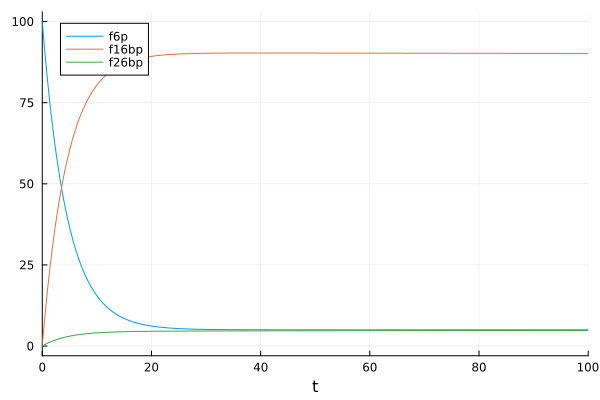

In [6]:
sys=structural_simplify(sys)

u0 = [f6p => 100,
    f16bp => 0,
    f26bp => 0]
p = [r_GP1 => 0.1,
    k1 => 0.2,
    k2 => 0.01,
    k3 => 0.01,
    k4 => 0.01,
    r_ALD => 0.1]

tspan = (0.0, 100)
prob = ODEProblem(sys, u0, tspan, p, jac = true)
sol = solve(prob)

using Plots
plot(sol)